<a href="https://colab.research.google.com/github/Falanger-debug/Data-Visualization/blob/main/BeautifulSoupStatki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Beautiful Soup Żegluj.pl

In [1]:
import json
import re
import pandas as pd
import urllib
from urllib.request import Request
from bs4 import BeautifulSoup

Będę analizował dane 18 stron html zegluj.pl.

In [2]:
import urllib.request
from bs4 import BeautifulSoup

url = "https://zegluj.pl/mazury?date_from=01-05-2025&date_to=07-05-2025&page="

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'
}

pages = []
for page_number in range(1, 18):
    print(f'Pobieranie strony {page_number}')
    req = urllib.request.Request(f'{url}{page_number}', headers=headers)
    with urllib.request.urlopen(req) as resp:
        processed_page = BeautifulSoup(resp.read().decode('utf-8'), "html.parser")
        pages.append(processed_page)




Pobieranie strony 1
Pobieranie strony 2
Pobieranie strony 3
Pobieranie strony 4
Pobieranie strony 5
Pobieranie strony 6
Pobieranie strony 7
Pobieranie strony 8
Pobieranie strony 9
Pobieranie strony 10
Pobieranie strony 11
Pobieranie strony 12
Pobieranie strony 13
Pobieranie strony 14
Pobieranie strony 15
Pobieranie strony 16
Pobieranie strony 17


In [4]:
pages[2]

<!DOCTYPE html>

<html lang="pl" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>⚓ Czarter jachtów Mazury 2025. Wynajem jachtów na Mazurach - zegluj.pl</title>
<meta content="Czarter jachtów Mazury - 2025. Jachty motorowe, houseboaty oraz żaglówki do czarteru na Mazurach. Porównaj ofertę 130 firm czarterowych, wybierz najlepszą ofertę. Na zegluj.pl znajdziesz najlepsze ceny czarterów oraz oferty last minute. Mazurskie jeziora" name="description"/>
<meta content="czarter, mazury" name="keywords"/>
<meta content="index, follow" name="robots"/>
<link href="https://zegluj.pl/mazury" rel="canonical"/>
<meta content="zegluj.pl | czartery jachtów. Porównaj oferty firm czarterowych. Rabaty do 30%." property="og:title"/>
<meta content="/assets/fb_zegluj-b6311e80fada9f469076f632f87ee111.jpg" property="og:image"/>
<meta content="Proste wyszukiwanie, szybka rezerwacja, intuicyjne określenie wolnych terminów, tylko dostępne oferty. Nowa jakość i wielkość oferty. Kochasz żeglarstwo? Znajdź coś d

Teraz chcę się dostać do konkretnych ofert

In [5]:
interere = []

for page in pages:
  interere += page.find_all(class_='yacht-box')


In [6]:
interere

[<div class="yacht-box">
 <div class="row">
 <div class="col-md-4 yacht-box__column yacht-box__column--overflowed">
 <div class="yacht-box__badge badge badge--positive">
 Bez patentu
 </div>
 <div class="yacht-box__image">
 <a href="/jacht/sasanka-600-viva/229#/avail/date_from=01-05-2025/date_to=07-05-2025/"><img alt="Mazury czarter - Sasanka 600 Viva" src="/system/yacht_cms_images/images/000/019/632/medium/sasanka-600-viva-1676896816.jpg?1676896815"/>
 </a><div class="yacht-box__location">
 <blockquote>Rydzewo, port Tło dla Mew</blockquote>
 </div>
 </div>
 </div>
 <div class="col-md-8 yacht-box__column">
 <div class="yacht-box__content">
 <div class="row">
 <div class="col-sm-7 yacht-box-content__left">
 <div class="yacht-box__title">
 <h3 class="yacht-box__name">
 Sasanka 600 Viva
 </h3>
 <div class="yacht-box__votescounter">
 <div id="details_more_info"></div>
 <a class="yacht-box__votes" href="/jacht/sasanka-600-viva/229/yacht_reviews#/avail/date_from=01-05-2025/date_to=07-05-2025

Teraz do dzieła, chcę stworzyć strukturę danych, w której będą przechowywane informacje, które mnie interesują

In [8]:
import re

yachtsData = []

for singleYachtHtml in interere:
  singleYacht = {}
  singleYacht['name'] = singleYachtHtml.find(class_="yacht-box__name").text.strip()
  singleYacht['price'] = float(singleYachtHtml.find(class_="price right").span.contents[0].replace(' ', '').replace('zł', '').replace('PLN', ''))
  singleYacht['img'] = f"https://zegluj.pl{singleYachtHtml.img['src']}"
  singleYacht['url'] = f"https://zegluj.pl{singleYachtHtml.find(class_='yacht-box__image').a['href']}"

  # Teraz ekstrakcja
  for row in singleYachtHtml.select('li.yacht-box-info__item'):
    data = row.find_all('div')
    info_type = data[0].text.strip()
    info_val = re.sub(r'\s+', '', data[1].text.strip())
    if 'osób' in info_type:
      try:
        singleYacht['people'] = int(info_val.split('-')[-1])
      except ValueError:
        singleYacht['people'] = None
    elif 'kabin' in info_type:
      try:
        singleYacht['cabins'] = int(info_val.split('-')[-1])
      except ValueError:
        singleYacht['cabins'] = None
    elif 'produkcji' in info_type:
        singleYacht['year'] = info_val

  yachtsData.append(singleYacht)


In [9]:
yachtsData

[{'name': 'Sasanka 600 Viva',
  'price': 1215.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/019/632/medium/sasanka-600-viva-1676896816.jpg?1676896815',
  'url': 'https://zegluj.pl/jacht/sasanka-600-viva/229#/avail/date_from=01-05-2025/date_to=07-05-2025/',
  'people': 4,
  'cabins': 0,
  'year': '2020'},
 {'name': 'Sasanka 660',
  'price': 1215.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/034/494/medium/sasanka-660-1740647573.jpg?1740647568',
  'url': 'https://zegluj.pl/jacht/sasanka-660/2329#/avail/date_from=01-05-2025/date_to=07-05-2025/',
  'people': 6,
  'cabins': 0,
  'year': '2012'},
 {'name': 'Sasanka 600 Viva',
  'price': 1215.0,
  'img': 'https://zegluj.pl/system/yacht_cms_images/images/000/021/791/medium/sasanka-600-viva-1686983464.jpeg?1686983463',
  'url': 'https://zegluj.pl/jacht/sasanka-600-viva/230#/avail/date_from=01-05-2025/date_to=07-05-2025/',
  'people': 4,
  'cabins': 0,
  'year': '2020'},
 {'name': 'Phobos 22',
  'price': 1

Teraz należy stworzyć DataFrame na podstawie scrapowanych danych

In [10]:
df = pd.DataFrame(yachtsData)
df['cabins'].fillna(0, inplace=True)
df.head(5)

<ipython-input-10-921bc0ccc4bb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cabins'].fillna(0, inplace=True)


,name,price,img,url,people,cabins,year
0,Sasanka 600 Viva,1215.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sasanka-600-viva/229#/...,4,0,2020
1,Sasanka 660,1215.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sasanka-660/2329#/avai...,6,0,2012
2,Sasanka 600 Viva,1215.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sasanka-600-viva/230#/...,4,0,2020
3,Phobos 22,1566.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/phobos-22/1927#/avail/...,4,0,2024
4,Antila 26,1620.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/antila-26/1201#/avail/...,8,0,2010


Skoro mamy już dane, to możemy na nich przeprowadzić ciekawe operacje i wizualizacje.

In [11]:
df.columns

Index(['name', 'price', 'img', 'url', 'people', 'cabins', 'year'], dtype='object')

In [12]:
df.describe()

,price,people,cabins
count,510.000000,510.000000,510.000000
mean,3970.082353,7.907843,1.778431
std,2142.734929,1.547333,1.278477
min,1215.000000,2.000000,0.000000
25%,2562.750000,7.000000,0.000000
50%,3300.000000,8.000000,2.000000
75%,4973.000000,9.000000,3.000000
max,15235.000000,11.000000,4.000000


<Axes: xlabel='people', ylabel='price'>

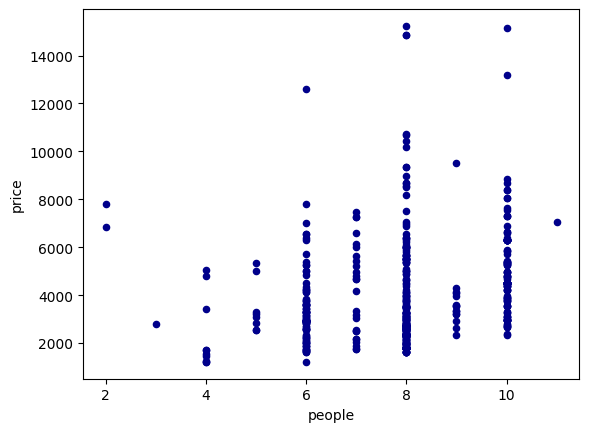

In [15]:
df.plot.scatter(x='people', y='price', c='DarkBlue')

Jakie łodzie mają najwięcej ofert?

In [16]:
boat_counts = df['name'].value_counts()
print(boat_counts)

name
Antila 27             32
Stillo 30             29
Twister 26            27
Antila 24.4           25
Maxus 33.1 RS         23
                      ..
Odysseya S36           1
Balt 1018 Tytan        1
Balt 818 Tytan         1
Parker 690             1
Parker 800 Weekend     1
Name: count, Length: 118, dtype: int64


A które są najdroższe?

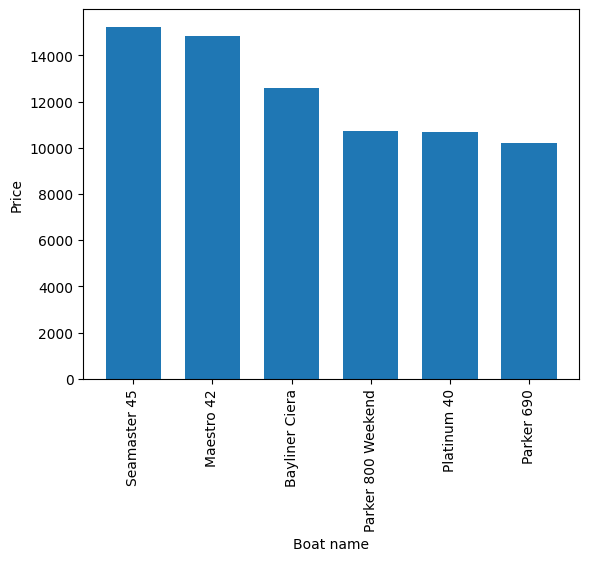

In [20]:
from matplotlib import pyplot as plt
prices_df = df.sort_values(by='price', ascending=False)
prices_df = prices_df.head(10)
plt.bar(prices_df['name'], prices_df['price'],  width = 0.7)
plt.xlabel('Boat name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title='Most expensive boats'

Jak wygląda macierz korelacji dla zmiennych?

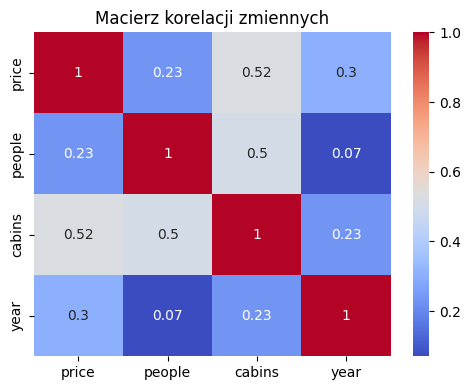

In [21]:
import seaborn as sns

plt.figure(figsize=(5,4))
corr = df[['price', 'people', 'cabins', 'year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm').set(title="Macierz korelacji zmiennych")
plt.tight_layout()
plt.show()

Chciałbym dodać jeszcze kilka kolumnd do DataFrame'u

In [23]:
yachtsData = []
for singleYachtHtml in interere:
    singleYacht = {}
    singleYacht['name'] = singleYachtHtml.find(class_="yacht-box__name").text.strip()
    singleYacht['price'] = float(singleYachtHtml.find(class_="price right").span.contents[0].replace(' ', '').replace('zł', '').replace('PLN', ''))
    singleYacht['img'] = f"https://zegluj.pl{singleYachtHtml.img['src']}"
    singleYacht['url'] = f"https://zegluj.pl{singleYachtHtml.find(class_='yacht-box__image').a['href']}"
    singleYacht['city'] = singleYachtHtml.find(class_="yacht-box__location").blockquote.contents[0].split(",")[0].strip()
    singleYacht['harbour'] = singleYachtHtml.find(class_="yacht-box__location").blockquote.contents[0].split(",")[-1].strip()

    if not singleYacht['harbour'].startswith("port"):
      raise Exception("Niepoprawna nazwa portu")


    # Teraz ekstrakcja
    for row in singleYachtHtml.select('li.yacht-box-info__item'):
      data = row.find_all('div')
      info_type = data[0].text.strip()
      info_val = re.sub(r'\s+', '', data[1].text.strip())
      if 'osób' in info_type:
        try:
          singleYacht['people'] = int(info_val.split('-')[-1])
        except ValueError:
          singleYacht['people'] = None
      elif 'kabin' in info_type:
        try:
          singleYacht['cabins'] = int(info_val.split('-')[-1])
        except ValueError:
          singleYacht['cabins'] = None
      elif 'produkcji' in info_type:
          singleYacht['year'] = info_val

    yachtsData.append(singleYacht)

df = pd.DataFrame.from_dict(yachtsData)
df['year'] = pd.to_numeric(df['year'])
df['cabins'] = df['cabins'].fillna(0)

df.head()

,name,price,img,url,city,harbour,people,cabins,year
0,Sasanka 600 Viva,1215.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sasanka-600-viva/229#/...,Rydzewo,port Tło dla Mew,4,0,2020
1,Sasanka 660,1215.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sasanka-660/2329#/avai...,Rydzewo,port Tło dla Mew,6,0,2012
2,Sasanka 600 Viva,1215.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/sasanka-600-viva/230#/...,Rydzewo,port Tło dla Mew,4,0,2020
3,Phobos 22,1566.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/phobos-22/1927#/avail/...,Prażmowo,port Dalpol,4,0,2024
4,Antila 26,1620.0,https://zegluj.pl/system/yacht_cms_images/imag...,https://zegluj.pl/jacht/antila-26/1201#/avail/...,Giżycko,port COS Giżycko,8,0,2010


In [24]:
df.columns

Index(['name', 'price', 'img', 'url', 'city', 'harbour', 'people', 'cabins',
       'year'],
      dtype='object')

Chcę sprawdzić rozkład jachtów konkretnych portach i miastach.

<ipython-input-32-0fa7fe5ba90c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=harbour_counts, x='harbour', y='count', palette='Blues_d')


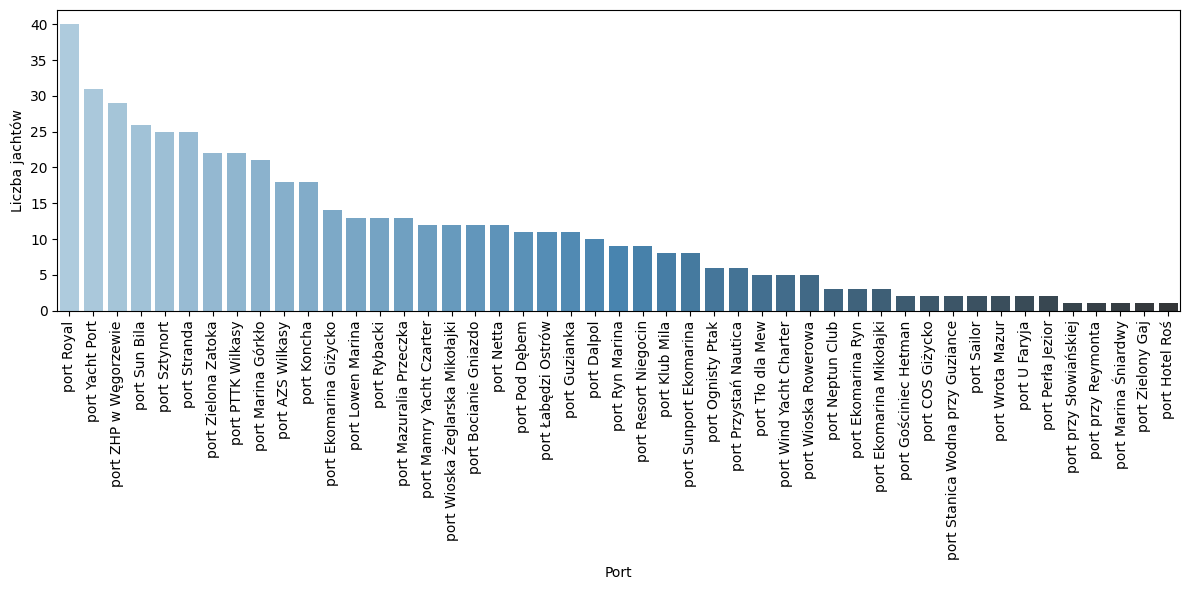

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

harbour_counts = df['harbour'].value_counts().reset_index()
harbour_counts.columns = ['harbour', 'count']

# Wykres słupkowy - porty
plt.figure(figsize=(12, 6))
sns.barplot(data=harbour_counts, x='harbour', y='count', palette='Blues_d')
plt.xlabel('Port')
plt.ylabel('Liczba jachtów')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-34-be08577c011a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts, x='city', y='count', palette='Greens_d')


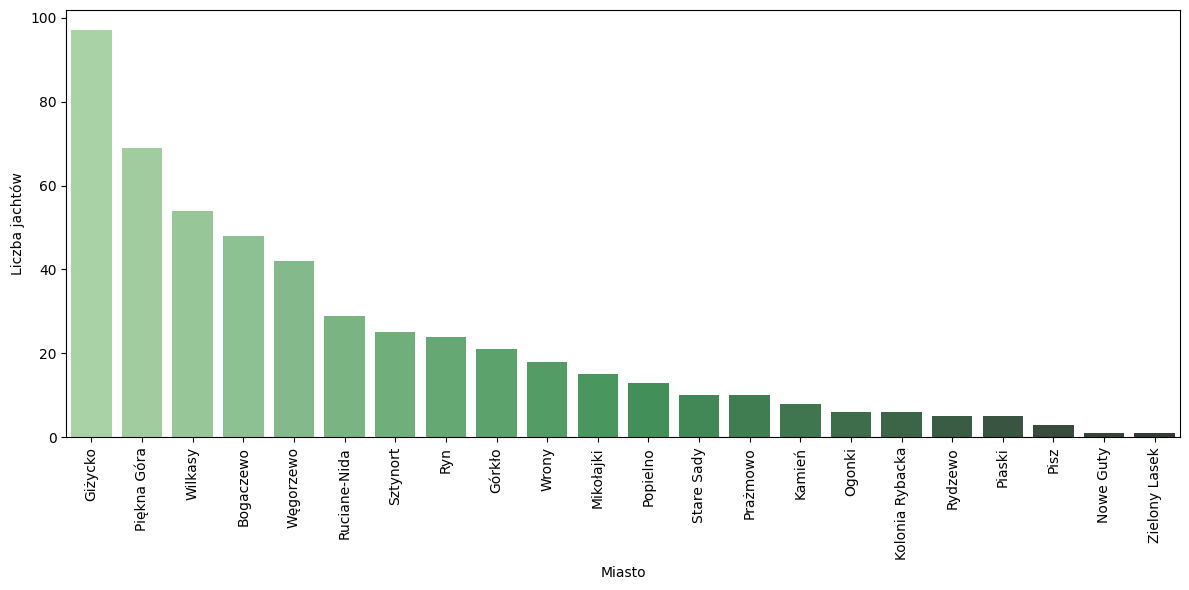

In [34]:
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'count']

# Wykres słupkowy - miasta
plt.figure(figsize=(12, 6))
sns.barplot(data=city_counts, x='city', y='count', palette='Greens_d')
plt.xlabel('Miasto')
plt.ylabel('Liczba jachtów')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()